In [4]:
from typing_extensions import TypedDict
from typing import Literal
import random
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

In [2]:
class TypedDictState(TypedDict):
    name:str
    game:Literal['cricket', 'badminton']

In [11]:
def play_game(state:TypedDictState):
    print("--Play game node has been called--")
    return {"name":state['name'] + " wants to play"}

def cricket(state: TypedDictState):
    print("--Cricket node has been called--")
    return {"name": state["name"] + " cricket" ,"game": "cricket"}

def badminton(state: TypedDictState):
    print("--Badminton node has been called--")
    return {"name": state["name"] + " badminton", "game": "badminton"}

In [12]:
def decide_play(state:TypedDictState) -> Literal['cricket', 'badminton']:
    print("--Decide play node has been called--")
    return random.choice(['cricket', 'badminton'])

In [13]:
builder = StateGraph(TypedDictState)

In [14]:
builder.add_node('playgame', play_game)
builder.add_node('cricket', cricket)
builder.add_node('badminton', badminton)

In [15]:
builder.add_edge(START, 'playgame')
builder.add_conditional_edges('playgame', decide_play)
builder.add_edge('cricket', END)
builder.add_edge('badminton', END)

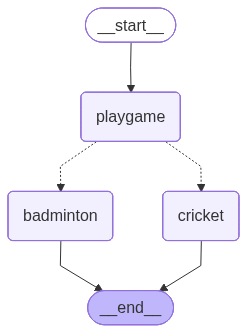

In [16]:
graph = builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [17]:
graph.invoke({"name": "kmk"})

--Play game node has been called--
--Decide play node has been called--
--Badminton node has been called--


{'name': 'kmk wants to play badminton', 'game': 'badminton'}

In [22]:
from dataclasses import dataclass 

@dataclass 
class DataClassState:
    name:str
    game:Literal['cricket', 'badminton']

In [30]:
def play_game_dc(state:DataClassState):
    print('play game')
    return {'name': state.name + "wants to play"}

def cricket_dc(state: DataClassState):
    print('cricket')
    return {'name': state.name + " cricket", "game": "cricket"}

def badminton_dc(state: DataClassState):
    print('badminton')
    return {'name': state.name + " badminton", "game": "badminton"}

In [31]:
builder = StateGraph(DataClassState)

builder.add_node('playgame', play_game_dc)
builder.add_node('cricket', cricket_dc)
builder.add_node('badminton', badminton_dc)

builder.add_edge(START, 'playgame')
builder.add_conditional_edges('playgame', decide_play)
builder.add_edge('cricket', END)
builder.add_edge('badminton', END)

graph = builder.compile()

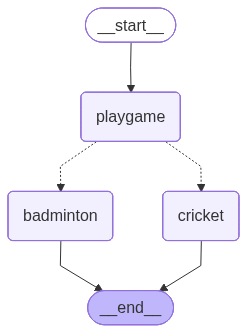

In [26]:
Image(graph.get_graph().draw_mermaid_png())

In [35]:
graph.invoke(DataClassState(name="kmk", game="cricket"))

play game
--Decide play node has been called--
cricket


{'name': 'kmkwants to play cricket', 'game': 'cricket'}

In [36]:
from pydantic import BaseModel

In [37]:
class PydanticState(BaseModel):
    name:str
    game:Literal('cricket', 'badminton')

TypeError: Cannot instantiate typing.Literal